# Data wrangling project

### Context
Wrangle [WeRateDogs](https://twitter.com/dog_rates) Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

In [1]:
import pandas as pd
import numpy as np
import twitter_credetials as twc
import requests
import tweepy
import json
import matplotlib.pyplot as plt

%matplotlib inline

## Gathering Data

In [2]:
twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
        file.write(response.content)

In [4]:
image_prd = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
auth = tweepy.OAuthHandler(twc.consumer_key, twc.consumer_secret)
auth.set_access_token(twc.access_token, twc.access_token_secret)
api = tweepy.API(auth)

In [12]:
with open('tweet_json.txt', 'w') as file:
    for tweet_id in twitter['tweet_id']:
        try:
            json.dump(api.get_status(tweet_id, wait_on_rate_limit=True)._json, file)
            file.write('\n')
        except tweepy.TweepError as e:
            print('{} : {}'.format(e.args[0][0]['message'], tweet_id))

No status found with that ID. : 888202515573088257
No status found with that ID. : 873697596434513921
No status found with that ID. : 872668790621863937
No status found with that ID. : 872261713294495745
No status found with that ID. : 869988702071779329
No status found with that ID. : 866816280283807744
No status found with that ID. : 861769973181624320
No status found with that ID. : 856602993587888130
No status found with that ID. : 851953902622658560
No status found with that ID. : 845459076796616705
No status found with that ID. : 844704788403113984
No status found with that ID. : 842892208864923648
No status found with that ID. : 837366284874571778
No status found with that ID. : 837012587749474308
No status found with that ID. : 829374341691346946
No status found with that ID. : 827228250799742977
No status found with that ID. : 812747805718642688
No status found with that ID. : 802247111496568832
No status found with that ID. : 775096608509886464
No status found with that ID. :

In [6]:
df = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet_dict = dict(json.loads(line))
        tweet_id = tweet_dict['id']
        favorite = tweet_dict['favorite_count']
        retweet = tweet_dict['retweet_count']
        
        df.append({'tweet_id': tweet_id,
                   'favorite_count': favorite,
                   'retweet_count': retweet})
        
twitter_plus = pd.DataFrame(df, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

## Assessing Data


In [7]:
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
image_prd

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
twitter_plus

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37414,8129
1,892177421306343426,32152,6025
2,891815181378084864,24248,3988
3,891689557279858688,40724,8294
4,891327558926688256,38952,8983
5,891087950875897856,19566,2984
6,890971913173991426,11432,1977
7,890729181411237888,63087,18092
8,890609185150312448,26921,4093
9,890240255349198849,30862,7071


In [10]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
image_prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
twitter_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null int64
favorite_count    2334 non-null int64
retweet_count     2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [13]:
twitter.duplicated().sum(), image_prd.duplicated().sum(), twitter_plus.duplicated().sum()

(0, 0, 0)

In [14]:
image_prd['p1'].sample(20)

412         jack-o'-lantern
1403       golden_retriever
723     Rhodesian_ridgeback
1377               malamute
480                 upright
85                   beagle
754               bannister
1690          Border_collie
600          French_bulldog
788                Pembroke
1560         Siberian_husky
1983      Shetland_sheepdog
1593              Chihuahua
1344      Shetland_sheepdog
656          Siberian_husky
1274     Labrador_retriever
624          French_bulldog
1126             Pomeranian
1583               Cardigan
1323               Pembroke
Name: p1, dtype: object

In [15]:
twitter.shape[0], image_prd.shape[0], twitter_plus.shape[0]

(2356, 2075, 2334)

### Quality

**twitter**
- Missing some `expanded_urls`.
- Many names aren't real names, sometimes is just a letter or syllable.
- Data type is wrong in `timestamp` column, should be date type.
- Discard retweets because we are interested just in original ratings.
- Discard `source`, `in_reply_to_status_id`, `in_reply_to_user_id` columns, because isn't necessary for this analysis.

**image_prd**
- Standardize `p1`,`p2`,`p3` columns to lowercase.
- Use underline as the standard separator.

**twitter_plus**
- Missing data, **twitter** has 2356 and **twitter_plus** has 2334.

### Tidiness

- Join the dataframe **twitter** with **twitter_plus**. 

**twitter**
- Convert the four columns `doggo`,`floofer`,`pupper` and `puppo` in just one called `stage`.

## Cleaning Data 

In [82]:
twitter_clean = twitter.copy()
image_prd_clean = image_prd.copy()
twitter_plus_clean = twitter_plus.copy()

### Tidiness

Join the dataframe **twitter** with **twitter_plus**

**Define**

Using the `merge` method to handle **twitter** and **twitter_plus**

**Code**


In [83]:
twitter_clean = pd.merge(twitter_clean, twitter_plus_clean, on='tweet_id', how='right')

**Test**

In [84]:
twitter_clean.info(), twitter_clean.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2334 entries, 0 to 2333
Data columns (total 19 columns):
tweet_id                      2334 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2334 non-null object
source                        2334 non-null object
text                          2334 non-null object
retweeted_status_id           165 non-null float64
retweeted_status_user_id      165 non-null float64
retweeted_status_timestamp    165 non-null object
expanded_urls                 2275 non-null object
rating_numerator              2334 non-null int64
rating_denominator            2334 non-null int64
name                          2334 non-null object
doggo                         2334 non-null object
floofer                       2334 non-null object
pupper                        2334 non-null object
puppo                         2334 non-null object
favorite_count                23

(None, (2334, 19))

In [85]:
twitter_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,37414,8129
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,32152,6025


In [86]:
twitter_clean.tail(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
2332,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,124,46
2333,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None,2491,489


Convert the four columns `doggo`, `floofer`, `pupper` and `puppo` in just one called stage

**Define**

Using the `melt` method to join columns in one column called stage and after putting in order, drop duplicate data

**Code**

In [87]:
# After review
def get_stage(row):
    stage = ','.join([item for item in row if item != 'None'])
    return 'None' if stage == '' else stage

In [88]:
twitter_clean['stage'] = twitter_clean[['doggo', 'floofer','pupper','puppo']].apply(get_stage, axis=1)

In [89]:
twitter_clean = twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

**Test**

In [90]:
twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'stage'],
      dtype='object')

In [91]:
twitter_clean['stage'].value_counts()

None             1958
pupper            244
doggo              80
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [92]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2334 entries, 0 to 2333
Data columns (total 16 columns):
tweet_id                      2334 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2334 non-null object
source                        2334 non-null object
text                          2334 non-null object
retweeted_status_id           165 non-null float64
retweeted_status_user_id      165 non-null float64
retweeted_status_timestamp    165 non-null object
expanded_urls                 2275 non-null object
rating_numerator              2334 non-null int64
rating_denominator            2334 non-null int64
name                          2334 non-null object
favorite_count                2334 non-null int64
retweet_count                 2334 non-null int64
stage                         2334 non-null object
dtypes: float64(4), int64(5), object(7)
memory usage: 310.0+ KB


###  Quality

### twitter

Data type is wrong in `timestamp` column, should be date type.

**Define**

Using the known method `to_datetime` to convert `timestamp` column.

**Code**

In [93]:
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

**Test**

In [94]:
twitter_clean['timestamp'].dtype

datetime64[ns, UTC]

Missing some `expanded_urls`

**Define**

Replace all `expanded_urls` using the standard url with `tweet_id` column.

**Code**

In [95]:
twitter_clean['expanded_urls'] = ['https://twitter.com/dog_rates/status/{}/photo/1'.format(tweet_id) for tweet_id in twitter_clean['tweet_id']]

**Test**

In [96]:
pd.set_option('display.max_colwidth', -1)
twitter_clean['expanded_urls'].head(), twitter_clean['expanded_urls'].tail()

(0    https://twitter.com/dog_rates/status/892420643555336193/photo/1
 1    https://twitter.com/dog_rates/status/892177421306343426/photo/1
 2    https://twitter.com/dog_rates/status/891815181378084864/photo/1
 3    https://twitter.com/dog_rates/status/891689557279858688/photo/1
 4    https://twitter.com/dog_rates/status/891327558926688256/photo/1
 Name: expanded_urls, dtype: object,
 2329    https://twitter.com/dog_rates/status/666049248165822465/photo/1
 2330    https://twitter.com/dog_rates/status/666044226329800704/photo/1
 2331    https://twitter.com/dog_rates/status/666033412701032449/photo/1
 2332    https://twitter.com/dog_rates/status/666029285002620928/photo/1
 2333    https://twitter.com/dog_rates/status/666020888022790149/photo/1
 Name: expanded_urls, dtype: object)

In [97]:
twitter['expanded_urls'].isnull().sum(), twitter_clean['expanded_urls'].isnull().sum()

(59, 0)

Many names aren't real names, sometimes is just a letter or syllable.

**Define**

Replace all names that are lowercase to 'None', because in assessing data we can look that mostly of wrong names are lowercase.

**Code**

In [98]:
twitter_clean['name'] = ['None' if name.islower() else name for name in twitter_clean['name']]

**Test**

In [99]:
twitter_clean['name'].head(), twitter_clean['name'].tail()

(0    Phineas 
 1    Tilly   
 2    Archie  
 3    Darla   
 4    Franklin
 Name: name, dtype: object, 2329    None
 2330    None
 2331    None
 2332    None
 2333    None
 Name: name, dtype: object)

In [100]:
twitter_clean['name'].value_counts()[:30]

None       846
Cooper     11 
Oliver     11 
Charlie    11 
Penny      10 
Lucy       10 
Tucker     10 
Lola       10 
Winston    9  
Bo         9  
Sadie      8  
Buddy      7  
Bailey     7  
Daisy      7  
Toby       7  
Dave       6  
Bella      6  
Jack       6  
Rusty      6  
Stanley    6  
Leo        6  
Jax        6  
Scout      6  
Oscar      6  
Milo       6  
Koda       6  
Sunny      5  
George     5  
Gus        5  
Finn       5  
Name: name, dtype: int64

Discard retweets because we are interested just in original ratings.

**Define**
    
Capture all row that retweeted is null, then we have just original tweets

**Code**

In [101]:
twitter_clean = twitter_clean[twitter_clean['retweeted_status_id'].isnull()]

**Test**

In [102]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2169 entries, 0 to 2333
Data columns (total 16 columns):
tweet_id                      2169 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2169 non-null datetime64[ns, UTC]
source                        2169 non-null object
text                          2169 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2169 non-null object
rating_numerator              2169 non-null int64
rating_denominator            2169 non-null int64
name                          2169 non-null object
favorite_count                2169 non-null int64
retweet_count                 2169 non-null int64
stage                         2169 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), int64(5), object(6)
memory usage: 

Discard `source`, `in_reply_to_status_id`, `in_reply_to_user_id columns`, because isn't necessary for this analysis.

**Define**

Just drop the useless columns

**code**

In [103]:
bad_columns = ['in_reply_to_status_id',
               'in_reply_to_user_id',
               'source', 'retweeted_status_id',
               'retweeted_status_user_id',
               'retweeted_status_timestamp']

twitter_clean = twitter_clean.drop(bad_columns, axis=1)

**Test**

In [104]:
twitter_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'stage'],
      dtype='object')

### image_prd
Standardize `p1`,`p2`,`p3` columns to lowercase.

**Define**

Transform all data in `p1`, `p2` and `p3` to lowercase
**Code**


In [105]:
image_prd_clean['p1'] = image_prd_clean['p1'].str.lower()
image_prd_clean['p2'] = image_prd_clean['p2'].str.lower()
image_prd_clean['p3'] = image_prd_clean['p3'].str.lower()

**Test**

In [106]:
image_prd_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [107]:
image_prd_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


Use underline as the standard separator.

**Define**

Replace all '-' to underline 

**Code**

In [108]:
image_prd_clean['p1'] = image_prd_clean['p1'].str.replace('-', '_')
image_prd_clean['p2'] = image_prd_clean['p2'].str.replace('-', '_')
image_prd_clean['p3'] = image_prd_clean['p3'].str.replace('-', '_')

**Test**

In [109]:
image_prd_clean.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1235,746507379341139972,https://pbs.twimg.com/media/Clwgf4bWgAAB15c.jpg,1,toy_poodle,0.508292,True,lakeland_terrier,0.234458,True,affenpinscher,0.084563,True
481,675362609739206656,https://pbs.twimg.com/media/CV9etctWUAAl5Hp.jpg,1,labrador_retriever,0.479008,True,ice_bear,0.218289,False,kuvasz,0.139911,True
1224,744971049620602880,https://pbs.twimg.com/media/ClarNU8VAAEDrDt.jpg,1,toy_poodle,0.497755,True,golden_retriever,0.282017,True,miniature_poodle,0.090032,True
610,680100725817409536,https://pbs.twimg.com/media/CW-loUBWYAAn2Cb.jpg,1,golden_retriever,0.698961,True,chow,0.145971,True,pomeranian,0.034888,True
1768,827199976799354881,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,great_dane,0.869681,True,american_staffordshire_terrier,0.026658,True,boxer,0.019866,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,saluki,0.122079,True,irish_wolfhound,0.004020,True
1569,794355576146903043,https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg,1,cocker_spaniel,0.500509,True,golden_retriever,0.272734,True,jigsaw_puzzle,0.041476,False
239,670435821946826752,https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg,1,sorrel,0.460370,False,basenji,0.135767,True,cardigan,0.099174,True
1236,746726898085036033,https://pbs.twimg.com/media/ClzoJz7WYAELHSf.jpg,1,golden_retriever,0.256505,True,labrador_retriever,0.252417,True,seat_belt,0.203163,False
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,french_loaf,0.018189,False


## Storing Data

In [110]:
twitter_clean.to_csv('twitter_archive_master.csv', index=False)
image_prd_clean.to_csv('image_predictions_master.csv', index=False)

## Analyzing and Visualizing Data

In [111]:
# Read updated files
df_twitter = pd.read_csv('twitter_archive_master.csv')
df_img_predic = pd.read_csv('image_predictions_master.csv')

**Visualizing**

Has some correlation with the quantity of favorited and retweeted

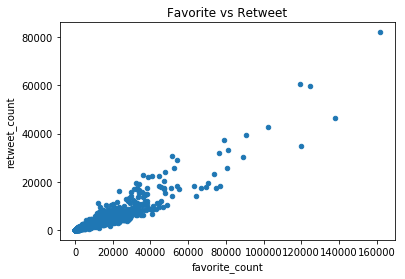

In [112]:
df_twitter.plot(kind='scatter', x='favorite_count', y='retweet_count', title='Favorite vs Retweet');

**Result:**
We can see that an ascending line, this mean when that post was retweeted more people liked.

**Insight**

Which dogs name is the most popular?

In [113]:
df_twitter['name'].value_counts()[0:10]

None       784
Oliver     10 
Lucy       10 
Charlie    10 
Cooper     10 
Tucker     9  
Penny      9  
Winston    8  
Lola       8  
Sadie      8  
Name: name, dtype: int64

**Result:**
In our data the most popular name is Cooper, but don't have great significance seen that has 784 None values.

**Insight**

Following the predictions, which are the most common dog breeds in WeRateDogs.

In [114]:
def best_predict(row):
    indx = np.argmax([row['p1_conf'], row['p2_conf'], row['p3_conf']])
    dog = row['p{}_dog'.format(indx+1)]
    if dog:
        best = row['p{}'.format(indx+1)]
        return best
    else:
        return None

In [115]:
df_twitter['breeds'] = df_img_predic.apply(best_predict, axis=1)

In [124]:
df_twitter[df_twitter['breeds']=='golden_retriever'].sort_values('favorite_count', ascending=False)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,stage,breeds
894,739544079319588864,2016-06-05 19:47:03+00:00,This... is a Tyrannosaurus rex. We only rate dogs. Please only send in dogs. Thank you ...10/10 https://t.co/zxw8d5g94P,https://twitter.com/dog_rates/status/739544079319588864/photo/1,10,10,None,40828,22339,None,golden_retriever
380,817423860136083457,2017-01-06 17:33:29+00:00,This is Ken. His cheeks are magic. 13/10 (IG: ken_shiba) https://t.co/btzf1zTDeQ,https://twitter.com/dog_rates/status/817423860136083457/photo/1,13,10,Ken,35699,15951,None,golden_retriever
178,852311364735569921,2017-04-13 00:03:59+00:00,This is Wiggles. She would like you to spot her. Probably won't need your help but just in case. 13/10 powerful as h*ck https://t.co/2d370P0OEg,https://twitter.com/dog_rates/status/852311364735569921/photo/1,13,10,Wiggles,33469,10115,None,golden_retriever
23,887343217045368832,2017-07-18 16:08:03+00:00,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,https://twitter.com/dog_rates/status/887343217045368832/photo/1,13,10,None,32567,10000,None,golden_retriever
387,816450570814898180,2017-01-04 01:05:59+00:00,Meet Moose. He doesn't want his friend to go back to college. 13/10 looks like you're staying home John https://t.co/LIhmM7i70k,https://twitter.com/dog_rates/status/816450570814898180/photo/1,13,10,Moose,32019,8694,None,golden_retriever
10,890006608113172480,2017-07-26 00:31:25+00:00,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,https://twitter.com/dog_rates/status/890006608113172480/photo/1,13,10,Koda,29673,7021,None,golden_retriever
68,878604707211726852,2017-06-24 13:24:20+00:00,Martha is stunning how h*ckin dare you. 13/10 https://t.co/9uABQXgjwa,https://twitter.com/dog_rates/status/878604707211726852/photo/1,13,10,None,29225,6924,None,golden_retriever
165,855818117272018944,2017-04-22 16:18:34+00:00,I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUST WANTS TO SAY HI AND MAYBE A NOGGIN PAT SHOW SOME RESPECT 13/10 https://t.co/5BEjzT2Tth,https://twitter.com/dog_rates/status/855818117272018944/photo/1,13,10,None,26641,5495,None,golden_retriever
1201,700747788515020802,2016-02-19 18:24:26+00:00,We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://t.co/22x9SbCYCU,https://twitter.com/dog_rates/status/700747788515020802/photo/1,11,10,None,23542,9732,None,golden_retriever
62,879492040517615616,2017-06-27 00:10:17+00:00,This is Bailey. He thinks you should measure ear length for signs of growth instead. 12/10 https://t.co/IxM9IMKQq8,https://twitter.com/dog_rates/status/879492040517615616/photo/1,12,10,Bailey,22700,3060,None,golden_retriever


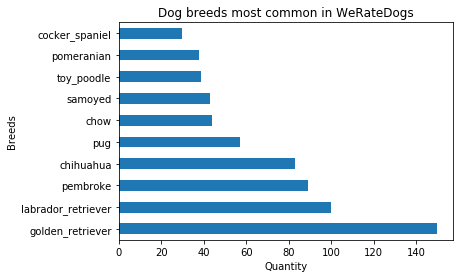

In [116]:
df_twitter['breeds'].value_counts()[:10].plot(kind='barh')
plt.title('Dog breeds most common in WeRateDogs')
plt.xlabel('Quantity')
plt.ylabel('Breeds');

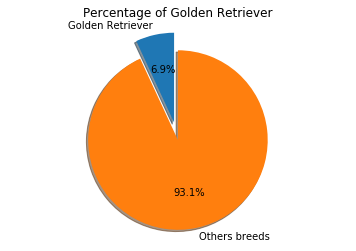

In [117]:
golden = df_twitter[df_twitter['breeds']=='golden_retriever'].shape[0]
others = df_twitter.shape[0]-golden
sizes = [golden, others]
labels = ['Golden Retriever', 'Others breeds']

explode = (0.2, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.title('Percentage of Golden Retriever')
plt.show();

**Result:** We can take a look the most commons dog breeds are Golden Retriever appearing in 6.9% of breeds showing some advantage over others, Labrador Retriever, Pembroke, Chihuahua, and Pug.

**Insight**

Dog breeds less posted on WeRateDogs twitter, and possibly less favored or retweet?

In [118]:
df_twitter['breeds'].value_counts().sort_values()[:10]

standard_schnauzer         1
groenendael                1
scotch_terrier             1
entlebucher                1
silky_terrier              1
clumber                    1
japanese_spaniel           1
toy_terrier                2
sussex_spaniel             2
wire_haired_fox_terrier    2
Name: breeds, dtype: int64

In [119]:
df_twitter.groupby('breeds').min().sort_values(['retweet_count','favorite_count'])[:10]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,stage
breeds,,,,,,,,,,
boxer,672591762242805761,2015-12-04 01:42:26+00:00,@serial @MrRoles OH MY GOD I listened to all of season 1 during a single road trip. I love you guys! I can confirm Bernie's 12/10 rating :),https://twitter.com/dog_rates/status/672591762242805761/photo/1,7,10,Frankie,51,2,None
dandie_dinmont,671186162933985280,2015-11-30 04:37:05+00:00,@mount_alex3 13/10,https://twitter.com/dog_rates/status/671186162933985280/photo/1,10,10,Milo,112,6,None
kuvasz,668221241640230912,2015-11-22 00:15:33+00:00,13/10 such a good doggo\n@spaghemily,https://twitter.com/dog_rates/status/668221241640230912/photo/1,10,10,Bentley,265,10,None
toy_poodle,672997845381865473,2015-12-05 04:36:04+00:00,@RealKentMurphy 14/10 confirmed,https://twitter.com/dog_rates/status/672997845381865473/photo/1,5,10,Beya,302,10,None
redbone,687732144991551489,2016-01-14 20:24:55+00:00,@Marc_IRL pixelated af 12/10,https://twitter.com/dog_rates/status/687732144991551489/photo/1,6,10,Bilbo,227,17,None
pembroke,667832474953625600,2015-11-20 22:30:44+00:00,"""Challenge completed"" \n(pupgraded to 12/10) https://t.co/85dTK7XCXB",https://twitter.com/dog_rates/status/667832474953625600/photo/1,6,10,Alejandro,242,17,None
kelpie,669367896104181761,2015-11-25 04:11:57+00:00,@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,https://twitter.com/dog_rates/status/669367896104181761/photo/1,8,10,Charlie,459,17,None
saluki,668623201287675904,2015-11-23 02:52:48+00:00,12/10 good shit Bubka\n@wane15,https://twitter.com/dog_rates/status/668623201287675904/photo/1,4,10,Jomathan,146,23,None
soft_coated_wheaten_terrier,707387676719185920,2016-03-09 02:08:59+00:00,Meet Clarkus. He's a Skinny Eastern Worcestershire. Can tie own shoes (impressive af) 10/10 would put on track team https://t.co/XP5o7zGn0E,https://twitter.com/dog_rates/status/707387676719185920/photo/1,7,10,Beau,247,25,None


In [120]:
breeds_mean = df_twitter.groupby('breeds').mean().sort_values(['retweet_count','favorite_count'], ascending=False)
breeds_mean[:10]

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count
breeds,,,,,
japanese_spaniel,7.887659e+17,12.000000,10.000000,28891.000000,11065.000000
wire_haired_fox_terrier,6.877818e+17,10.500000,10.000000,17282.500000,10186.500000
irish_terrier,7.716884e+17,11.500000,10.000000,30215.500000,9402.166667
rhodesian_ridgeback,7.648635e+17,11.000000,10.000000,20126.000000,5962.250000
schipperke,7.239415e+17,10.300000,10.000000,11720.100000,5302.400000
miniature_pinscher,7.414337e+17,10.608696,10.000000,14006.217391,5137.565217
miniature_schnauzer,7.945474e+17,12.000000,10.000000,16391.250000,5103.000000
basset,7.307612e+17,10.384615,10.000000,12992.153846,4986.000000
saint_bernard,7.444181e+17,10.428571,10.142857,14118.857143,4940.142857


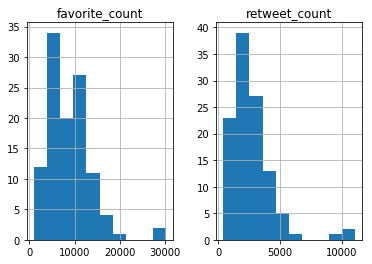

In [121]:
breeds_mean[['favorite_count','retweet_count']].hist();

**Result:** Well, fist a list of dog breeds less posted on the page, but after we look if had some relation with which has less favorite and retweet, but have no one, and looking at the bigger mean of retweet and favorite we see a dog breed from the list `japanese_spaniel`, but it's because has just one or two posts so the mean is elevated.